In [2]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureNormal_Ek.csv')

#data = pd.read_csv('../ravdes/featureEmodb_Ek.csv')

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,0.1,0.2,speaker
0,-673.301697,69.508095,-3.494582,18.998575,5.041687,4.626438,-7.605268,-0.057042,-16.231766,-0.299419,...,31.995356,-0.051473,0.025316,-0.044013,-0.079353,0.022513,0.010037,1,1,1
1,-663.297852,67.747589,-6.961255,22.244839,5.313937,2.970508,-6.046401,-3.327282,-17.383774,0.806942,...,31.223174,-0.079423,0.034342,-0.070702,-0.074578,0.025509,-0.001626,1,1,1
2,-664.776184,70.703842,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,31.753796,-0.024101,-0.010724,-0.007700,0.022802,-0.000364,0.032532,1,1,1
3,-660.674133,69.261803,-1.020717,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,30.522612,-0.065819,0.008619,0.004848,-0.030447,-0.000754,0.014753,1,1,1
4,-699.495178,76.727394,-1.602398,21.554548,4.587931,6.054961,-8.122147,-1.003357,-15.158166,-2.688365,...,31.293542,-0.070505,0.011104,0.031151,-0.115693,0.024391,0.003346,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015,0,8,24
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375,0,8,24
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219,0,8,24
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220,0,8,24


In [4]:
import joblib

# Load the saved scaler
scaler = joblib.load(main_dir + "scaler.pkl")

# Load the saved model
gender_model = tf.keras.models.load_model(main_dir + "gender_classification_model.h5")

In [5]:
# Keep only the first 193 columns
X_gender = data.iloc[:, :193].values

# Standardize features
X_scaled = scaler.transform(X_gender)

# Predict genders
gender_predictions = gender_model.predict(X_scaled)

45/45 [==============================] - 0s 1ms/step


In [6]:
print(gender_predictions)

[[0.00117782]
 [0.00119555]
 [0.00191538]
 ...
 [0.9992058 ]
 [0.9988703 ]
 [0.99873227]]


In [7]:
male_rows = gender_predictions.flatten() >= 0.5  # 0 for Male, 1 for Female

df = data[male_rows]

print(f"Filtered dataset contains {df.shape[0]} male samples.")

Filtered dataset contains 720 male samples.


In [8]:
df.shape

(720, 196)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,0.1,0.2,speaker
60,-626.065857,67.129211,-14.506104,13.734784,-8.915299,-0.597560,-9.627712,-6.697053,-7.643127,1.682984,...,32.684056,-0.035477,0.046495,0.018824,-0.060412,0.011128,0.000489,0,1,2
61,-622.978882,61.610241,-16.155281,17.274385,-10.515155,-0.012929,-9.384588,-5.405496,-6.061921,0.427206,...,32.054128,-0.038423,0.033620,0.028817,-0.024666,0.011614,-0.008258,0,1,2
62,-594.977844,62.693829,-16.257780,9.051161,-9.175509,-0.249130,-9.898236,-7.671722,-8.782819,0.426915,...,31.869979,-0.053699,0.053169,0.032318,-0.044163,0.002315,-0.013748,0,1,2
63,-612.936279,58.990162,-15.687172,10.080914,-11.711167,-1.830589,-11.331991,-8.769240,-10.589375,-0.807020,...,31.140206,-0.045528,0.042565,-0.070671,-0.055261,0.010003,-0.008018,0,1,2
64,-639.557617,64.624420,-8.859457,17.944416,-9.782133,2.161584,-7.936422,-4.958043,-6.853294,0.523445,...,31.837218,-0.089607,0.068644,-0.019986,-0.011248,0.001546,0.004188,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015,0,8,24
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375,0,8,24
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219,0,8,24
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220,0,8,24


In [10]:
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [11]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
60,-626.065857,67.129211,-14.506104,13.734784,-8.915299,-0.597560,-9.627712,-6.697053,-7.643127,1.682984,...,15.032267,17.122944,17.137267,32.684056,-0.035477,0.046495,0.018824,-0.060412,0.011128,0.000489
61,-622.978882,61.610241,-16.155281,17.274385,-10.515155,-0.012929,-9.384588,-5.405496,-6.061921,0.427206,...,15.800671,16.939402,16.786359,32.054128,-0.038423,0.033620,0.028817,-0.024666,0.011614,-0.008258
62,-594.977844,62.693829,-16.257780,9.051161,-9.175509,-0.249130,-9.898236,-7.671722,-8.782819,0.426915,...,15.484927,17.181703,18.043089,31.869979,-0.053699,0.053169,0.032318,-0.044163,0.002315,-0.013748
63,-612.936279,58.990162,-15.687172,10.080914,-11.711167,-1.830589,-11.331991,-8.769240,-10.589375,-0.807020,...,15.257555,16.719364,17.726324,31.140206,-0.045528,0.042565,-0.070671,-0.055261,0.010003,-0.008018
64,-639.557617,64.624420,-8.859457,17.944416,-9.782133,2.161584,-7.936422,-4.958043,-6.853294,0.523445,...,16.251168,17.629721,16.558219,31.837218,-0.089607,0.068644,-0.019986,-0.011248,0.001546,0.004188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,16.391113,18.151034,17.573820,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,16.270073,17.091367,17.932740,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,16.128660,16.947312,18.503842,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,16.307834,17.859030,17.360766,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220


In [12]:
y

60      1
61      1
62      1
63      1
64      2
       ..
1435    8
1436    8
1437    8
1438    8
1439    8
Name: 0.2, Length: 720, dtype: int64

In [13]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)

In [14]:
X.shape, y.shape

((720, 193), (720,))

In [15]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [16]:
y1

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
X.shape, y1.shape

((720, 193), (720, 8))

In [18]:
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [19]:
X2.shape, y2.shape

((720, 193), (720,))

In [20]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [21]:
import random, numpy as np
from keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [22]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-410.780914,44.199100,-29.498060,2.086046,-8.025251,-7.174236,-11.139585,-7.754736,-13.592397,12.432094,...,19.428274,19.267550,19.263966,31.997059,0.011744,0.012536,-0.013344,0.015875,0.016408,0.012406
1,-466.320862,67.878372,-30.187313,7.150926,-9.144579,-4.960621,-18.812977,-21.444777,-7.235652,2.247374,...,19.518405,20.353243,22.145108,31.130833,-0.047754,0.012016,0.002294,0.023651,0.013967,0.002920
2,-572.931335,51.709187,-21.052465,8.714667,-13.856850,-3.589110,-8.977153,-7.746683,-8.706645,-0.947233,...,15.045509,16.914524,17.728696,31.289139,-0.026764,0.013590,-0.049211,-0.018586,0.000670,-0.000553
3,-500.814331,54.909172,-30.703037,16.980692,-1.514954,-8.571240,-8.591812,-11.234995,-8.691097,-2.685212,...,17.271279,18.673999,20.476686,32.324949,-0.079391,-0.027062,-0.065309,0.046250,0.042148,0.016192
4,-401.040802,37.012089,-25.934832,7.042574,-16.766260,-10.274925,-9.453162,-11.887827,-17.634357,7.540569,...,17.637454,18.237427,20.037184,32.348048,-0.010197,0.035208,-0.045643,-0.015274,-0.004024,0.003987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-644.772583,61.138340,-13.468080,8.149558,-16.597828,-1.040846,-21.411978,-11.137970,-14.684502,-1.909690,...,15.628375,16.960961,16.436982,32.163103,-0.057815,0.065458,0.012634,0.002165,0.018058,-0.027380
716,-566.816162,43.368359,-15.307161,2.067335,-9.152300,-6.163722,-13.324579,-12.101171,-12.638726,-1.018285,...,17.029112,17.465603,17.662481,29.864309,-0.039929,0.013363,-0.034609,-0.003479,0.025737,-0.010313
717,-478.766022,73.137833,-16.414293,7.870032,-7.602270,-1.200238,-17.209576,-15.361103,-11.571535,1.926383,...,17.162428,19.912594,20.361990,31.162177,0.007285,0.001611,-0.019291,-0.024284,-0.000465,0.001735
718,-559.119263,47.521179,-13.219441,10.803747,-4.820639,-7.630402,-17.089399,-8.979336,-12.113929,3.582775,...,15.592766,16.871436,17.653203,31.580140,-0.006078,0.050865,0.016923,-0.080251,0.019615,0.001849


In [23]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=720
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    #print(a[i])

    model_name = 'Model_'+str(i)
    savedir='RAVDESS_gender_female'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Training set: 4 folds (80%)
    split4=np.concatenate((a[i%kfold],a[(i+1)%kfold],a[(i+2)%kfold],a[(i+3)%kfold]), axis=0)
    split4=np.sort(split4)
    X_train= X3.iloc[split4,:]
    y_train= y1[split4,:]

    # Testing set: 1 fold (20%)
    split1= np.sort(a[(i+4)%kfold])
    X_test = X3.iloc[split1,:]
    y_test = y1[split1,:]


    overlap_indices = np.intersect1d(split4, split1)
    if len(overlap_indices) > 0:
        print(f"⚠️ Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"✅ No overlap in fold {i}.")

    print(f"Fold {i} -> Train samples: {len(split4)}, Test samples: {len(split1)}")

    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs_train = y.iloc[split4]
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:10]

    for i, idx in enumerate(fs_indices):
        print(f"Rank {i+1}: Feature {idx} - Score: {score[idx]:.4f}")

✅ No overlap in fold 0.
Fold 0 -> Train samples: 576, Test samples: 144
Rank 1: Feature 0 - Score: 192.0000
Rank 2: Feature 2 - Score: 191.0000
Rank 3: Feature 1 - Score: 190.0000
Rank 4: Feature 7 - Score: 189.0000
Rank 5: Feature 6 - Score: 188.0000
Rank 6: Feature 5 - Score: 187.0000
Rank 7: Feature 137 - Score: 186.0000
Rank 8: Feature 37 - Score: 185.0000
Rank 9: Feature 164 - Score: 184.0000
Rank 10: Feature 104 - Score: 183.0000
✅ No overlap in fold 1.
Fold 1 -> Train samples: 576, Test samples: 144
Rank 1: Feature 0 - Score: 192.0000
Rank 2: Feature 2 - Score: 191.0000
Rank 3: Feature 1 - Score: 190.0000
Rank 4: Feature 9 - Score: 189.0000
Rank 5: Feature 8 - Score: 188.0000
Rank 6: Feature 5 - Score: 187.0000
Rank 7: Feature 92 - Score: 186.0000
Rank 8: Feature 58 - Score: 185.0000
Rank 9: Feature 171 - Score: 184.0000
Rank 10: Feature 130 - Score: 183.0000
✅ No overlap in fold 2.
Fold 2 -> Train samples: 576, Test samples: 144
Rank 1: Feature 0 - Score: 192.0000
Rank 2: Featu

In [ ]:
### scores

In [34]:
sum=.0
for i in scores:sum+=i[1]

print(sum, sum/len(scores))

3.237603783607483 0.6475207567214966


In [47]:
scores

[[1.4199223518371582, 0.4655172526836395],
 [1.3555432558059692, 0.5245901346206665],
 [1.0535591840744019, 0.6811594367027283],
 [1.3914963006973267, 0.47887325286865234],
 [1.317863941192627, 0.5116279125213623]]

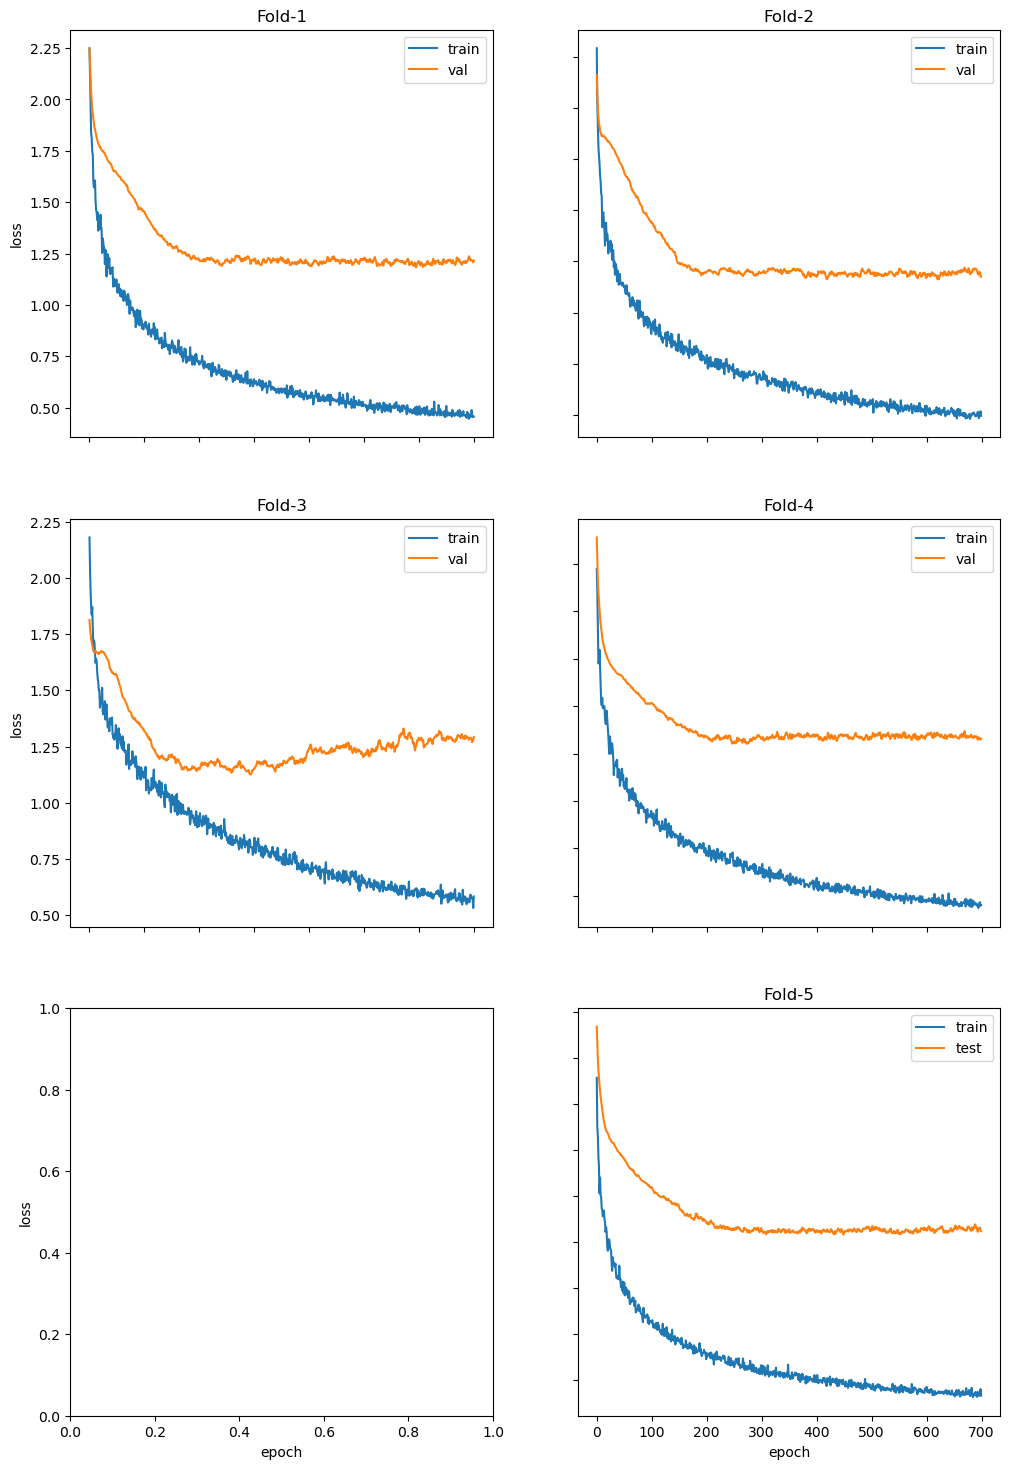

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [ ]:
### Model yükleme, gereksizse yapma

In [1]:
# loading json and creating model
from keras.models import model_from_json
savedir='RAVDESS_gender_female'
m='Model_2'

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Loaded model from disk


Testing data from the same pool

In [2]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X2.npy')
yloaded=np.load(savedir+'/y2.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 68.53%


In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

5/5 [==============================] - 0s 29ms/step
(143, 8)
143


array([[ 7,  0,  0,  1,  1,  0,  0,  1],
       [ 1,  8,  0,  2,  0,  0,  0,  0],
       [ 2,  2, 16,  1,  0,  0,  0,  2],
       [ 1,  2,  1, 14,  0,  3,  1,  1],
       [ 0,  0,  2,  0, 12,  0,  2,  0],
       [ 0,  1,  3,  3,  0, 10,  0,  1],
       [ 0,  0,  1,  2,  2,  1, 13,  2],
       [ 0,  0,  1,  0,  0,  0,  2, 18]], dtype=int64)

In [4]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 8):
    sumik = np.sum(array[it])
    for it2 in range(0, 8):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[70.   0.   0.  10.  10.   0.   0.  10. ]
 [ 9.1 72.7  0.  18.2  0.   0.   0.   0. ]
 [ 8.7  8.7 69.6  4.3  0.   0.   0.   8.7]
 [ 4.3  8.7  4.3 60.9  0.  13.   4.3  4.3]
 [ 0.   0.  12.5  0.  75.   0.  12.5  0. ]
 [ 0.   5.6 16.7 16.7  0.  55.6  0.   5.6]
 [ 0.   0.   4.8  9.5  9.5  4.8 61.9  9.5]
 [ 0.   0.   4.8  0.   0.   0.   9.5 85.7]]


           angry  calm  disgust  fearful  happy  neutral   sad  surprised
angry       70.0   0.0      0.0     10.0   10.0      0.0   0.0       10.0
calm         9.1  72.7      0.0     18.2    0.0      0.0   0.0        0.0
disgust      8.7   8.7     69.6      4.3    0.0      0.0   0.0        8.7
fearful      4.3   8.7      4.3     60.9    0.0     13.0   4.3        4.3
happy        0.0   0.0     12.5      0.0   75.0      0.0  12.5        0.0
neutral      0.0   5.6     16.7     16.7    0.0     55.6   0.0        5.6
sad          0.0   0.0      4.8      9.5    9.5      4.8  61.9        9.5
surprised    0.0   0.0      4.8      0.0    0.0      0.0   9.5       85.7



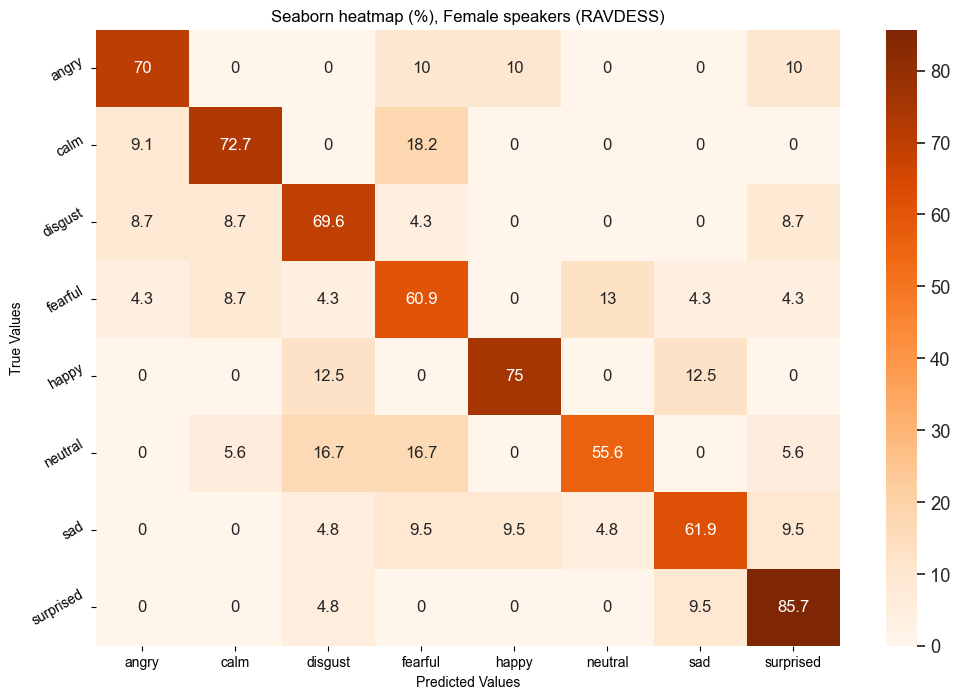

In [5]:
listik = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), Female speakers (RAVDESS)')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()